<a href="https://colab.research.google.com/github/dor-roter/learning-tensor-flow/blob/master/Basic_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense,LSTM, Flatten
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
# get stock quote
df = web.DataReader('MSFT', data_source='yahoo', start='2005-01-01', end='2020-03-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,26.950001,26.650000,26.799999,26.740000,65002900.0,19.347652
2005-01-04,27.100000,26.660000,26.870001,26.840000,109442100.0,19.420000
2005-01-05,27.100000,26.760000,26.840000,26.780001,72463500.0,19.376589
2005-01-06,27.059999,26.639999,26.850000,26.750000,76890500.0,19.354885
2005-01-07,26.889999,26.620001,26.820000,26.670000,68723300.0,19.297003
...,...,...,...,...,...,...
2020-03-18,146.000000,135.020004,138.000000,140.399994,81593200.0,140.399994
2020-03-19,150.149994,139.000000,142.770004,142.710007,85922700.0,142.710007
2020-03-20,147.100006,135.860001,146.000000,137.350006,84866200.0,137.350006


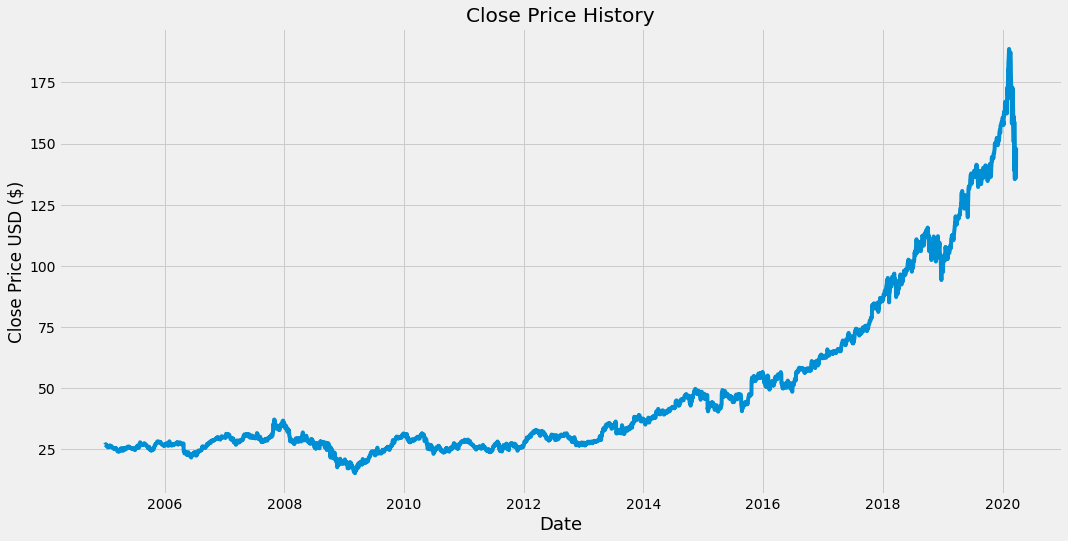

In [ ]:
# visualize closing stock data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
# create a new dataframe with only 'Open' and 'Close' columns
data = df.filter(['Close'])
dataset = data.values

# set training data size
precentage = 0.9
training_data_len = math.ceil(len(dataset) * precentage)

# scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
dataset

array([[ 26.73999977],
       [ 26.84000015],
       [ 26.78000069],
       ...,
       [137.3500061 ],
       [135.97999573],
       [148.33999634]])

In [ ]:
# create taining dataset

train_data = scaled_data[0:training_data_len, 0:training_data_len]
x_train = []
y_train = []

# fill x, y training datasets
for i in range(3, len(train_data)):
  x_train.append(train_data[i-3:i, 0])
  y_train.append(train_data[i, 0])


In [ ]:
print(len(x_train))
print(len(y_train))

3389
3389


In [ ]:
# convers to np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(3389, 60, 1)
(3389,)


In [ ]:
# build LSTM Model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
3389/3389 [==============================] - 5s 1ms/step - loss: 0.0034 - accuracy: 2.9507e-04
Epoch 2/100
3389/3389 [==============================] - 4s 1ms/step - loss: 9.0569e-05 - accuracy: 2.9507e-04
Epoch 3/100
3389/3389 [==============================] - 4s 1ms/step - loss: 5.4142e-05 - accuracy: 2.9507e-04
Epoch 4/100
3389/3389 [==============================] - 4s 1ms/step - loss: 5.2362e-05 - accuracy: 2.9507e-04
Epoch 5/100
3389/3389 [==============================] - 4s 1ms/step - loss: 5.0094e-05 - accuracy: 2.9507e-04
Epoch 6/100
3389/3389 [==============================] - 4s 1ms/step - loss: 5.1014e-05 - accuracy: 2.9507e-04
Epoch 7/100
3389/3389 [==============================] - 4s 1ms/step - loss: 4.8733e-05 - accuracy: 2.9507e-04
Epoch 8/100
3389/3389 [==============================] - 4s 1ms/step - loss: 4.7075e-05 - accuracy: 2.9507e-04
Epoch 9/100
3389/3389 [==============================] - 4s 1ms/step - loss: 4.7351e-05 - accuracy: 2.9507e-04
Epoch

In [ ]:
# create test
test_data = scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, :])


In [ ]:
 # reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# get the RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.0474226947154985

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


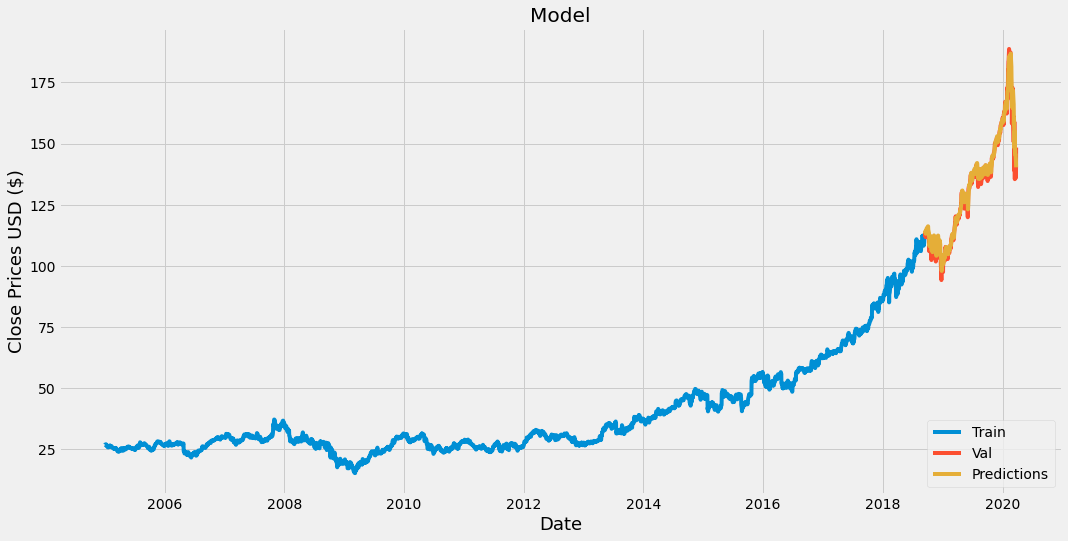

In [ ]:
# plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prices USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [ ]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-09-14,113.370003,113.487495
2018-09-17,112.139999,114.155960
2018-09-18,113.209999,113.644478
2018-09-19,111.699997,113.770691
2018-09-20,113.570000,113.073708
...,...,...
2020-03-18,140.399994,147.372620
2020-03-19,142.710007,145.412354
2020-03-20,137.350006,145.553604


In [ ]:
# predict for 2020-04-20
apple_quote = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2020-04-23')

new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
Xtest = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[171.69269]]


In [ ]:
# get acualt price
apple_quote2 = web.DataReader('MSFT', data_source='yahoo', start='2020-04-24', end='2020-04-24')
print(apple_quote2['Close'])

Date
2020-04-24    174.550003
Name: Close, dtype: float64
